<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Importing-Relevant-Dataset-and-Libraries" data-toc-modified-id="Importing-Relevant-Dataset-and-Libraries-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Importing Relevant Dataset and Libraries</a></span></li><li><span><a href="#EDA" data-toc-modified-id="EDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>EDA</a></span><ul class="toc-item"><li><span><a href="#Revenue-by-channels" data-toc-modified-id="Revenue-by-channels-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Revenue by channels</a></span></li><li><span><a href="#Distribution-of-recency" data-toc-modified-id="Distribution-of-recency-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Distribution of recency</a></span></li><li><span><a href="#Distribution-of-frequency-of-purchases-by-channel" data-toc-modified-id="Distribution-of-frequency-of-purchases-by-channel-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Distribution of frequency of purchases by channel</a></span></li><li><span><a href="#Age-distribution" data-toc-modified-id="Age-distribution-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Age distribution</a></span></li><li><span><a href="#Dwelling-distribution" data-toc-modified-id="Dwelling-distribution-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Dwelling distribution</a></span></li><li><span><a href="#Occupation-distribution" data-toc-modified-id="Occupation-distribution-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Occupation distribution</a></span></li><li><span><a href="#Income-distribution" data-toc-modified-id="Income-distribution-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Income distribution</a></span></li><li><span><a href="#Distribution-of-presence-of-children-per-channel" data-toc-modified-id="Distribution-of-presence-of-children-per-channel-2.8"><span class="toc-item-num">2.8&nbsp;&nbsp;</span>Distribution of presence of children per channel</a></span></li><li><span><a href="#Plot-of-revenue-against-length-of-resident-for-each-channel" data-toc-modified-id="Plot-of-revenue-against-length-of-resident-for-each-channel-2.9"><span class="toc-item-num">2.9&nbsp;&nbsp;</span>Plot of revenue against length of resident for each channel</a></span></li><li><span><a href="#Plot-distance-from-store-against-revenue-for-each-channel" data-toc-modified-id="Plot-distance-from-store-against-revenue-for-each-channel-2.10"><span class="toc-item-num">2.10&nbsp;&nbsp;</span>Plot distance from store against revenue for each channel</a></span></li></ul></li></ul></div>

# Importing Relevant Dataset and Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import collections
from collections import Counter
pd.set_option("display.max_column", None)

In [2]:
df_summary = pd.read_csv("DMEFExtractSummaryV01.CSV")
df_summary.head()

,Cust_ID,SCF_Code,RetF07Dollars,RetF07Trips,RetF07Lines,RetS07Dollars,RetS07Trips,RetS07Lines,RetF06Dollars,RetF06Trips,RetF06Lines,RetS06Dollars,RetS06Trips,RetS06Lines,RetF05Dollars,RetF05Trips,RetF05Lines,RetS05Dollars,RetS05Trips,RetS05Lines,RetF04Dollars,RetF04Trips,RetF04Lines,RetS04Dollars,RetS04Trips,RetS04Lines,RetPre04Dollars,RetPre04Trips,RetPre04Lines,RetPre04Recency,IntF07GDollars,IntF07NGDollars,IntF07Orders,IntF07Lines,IntS07GDollars,IntS07NGDollars,IntS07Orders,IntS07Lines,IntF06GDollars,IntF06NGDollars,IntF06Orders,IntF06Lines,IntS06GDollars,IntS06NGDollars,IntS06Orders,IntS06Lines,IntF05GDollars,IntF05NGDollars,IntF05Orders,IntF05Lines,IntS05GDollars,IntS05NGDollars,IntS05Orders,IntS05Lines,IntF04GDollars,IntF04NGDollars,IntF04Orders,IntF04Lines,IntS04GDollars,IntS04NGDollars,IntS04Orders,IntS04Lines,IntPre04GDollars,IntPre04NGDollars,IntPre04Orders,IntPre04Lines,IntPre04Recency,CatF07GDollars,CatF07NGDollars,CatF07Orders,CatF07Lines,CatS07GDollars,CatS07NGDollars,CatS07Orders,CatS07Lines,CatF06GDollars,CatF06NGDollars,CatF06Orders,CatF06Lines,CatS06GDollars,CatS06NGDollars,CatS06Orders,CatS06Lines,CatF05GDollars,CatF05NGDollars,CatF05Orders,CatF05Lines,CatS05GDollars,CatS05NGDollars,CatS05Orders,CatS05Lines,CatF04GDollars,CatF04NGDollars,CatF04Orders,CatF04Lines,CatS04GDollars,CatS04NGDollars,CatS04Orders,CatS04Lines,CatPre04GDollars,CatPre04NGDollars,CatPre04Orders,CatPre04Lines,CatPre04Recency,EmailsF07,EmailsS07,EmailsF06,EmailsS06,EmailsF05,EmailsS05,CatCircF07,CatCircS07,CatCircF06,CatCircS06,CatCircF05,CatCircS05,GiftRecF07,GiftRecS07,GiftRecF06,GiftRecS06,GiftRecF05,GiftRecS05,GiftRecF04,GiftRecS04,GiftRecPre04,NewGRF07,NewGRS07,NewGRF06,NewGRS06,NewGRF05,NewGRS05,NewGRF04,NewGRS04,NewGRPre04,FirstYYMM,FirstChannel,FirstDollar,StoreDist,AcqDate,Email,OccupCd,Travel,CurrAff,CurrEv,Wines,FineArts,Exercise,SelfHelp,Collect,Needle,Sewing,DogOwner,CarOwner,Cooking,Pets,Fashion,Camping,Hunting,Boating,AgeCode,IncCode,HomeCode,Child0_2,Child3_5,Child6_11,Child12_16,Child17_18,Dwelling,LengthRes,HomeValue
0,22120,346,0,0,0,0,0,0,14,1,1,0,0,0,0,0,0,0,0,0,70,1,5,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,6,1,4,0,8,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200412,Ret,70,15.93,200412,N,,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,N,4,8,2,N,N,N,N,N,1,8,0
1,24436,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,41,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,61,16,37,9,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,200706,Cat,41,,199611,Y,,N,N,N,,N,,,N,N,N,N,N,N,N,N,,N,,,,,N,N,N,N,N,,3,0
2,29278,85,0,0,0,0,0,0,63,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,29,0,1,1,0,0,0,0,27,0,1,1,0,0,0,0,65,0,1,2,0,0,0,0,65,0,1,2,0,0,0,0,25,0,1,1,1,0,0,0,0,0,0,2,0,2,0,3,2,1,0,1,0,2,0,2,0,1,0,0,0,0,0,0,1,0,1,200312,Cat,25,0,200312,N,,Y,N,Y,Y,Y,Y,N,Y,N,N,Y,N,Y,N,Y,N,N,N,7,9,2,N,N,N,N,N,2,2,0
3,50011,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,36,46,1,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,34,12,42,31,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200301,Int,82,,199712,Y,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
4,51943,,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,99,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,0,1,1,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,209,0,1,1,5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,200112,Cat,209,,199903,N,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,


# EDA

## Revenue by channels

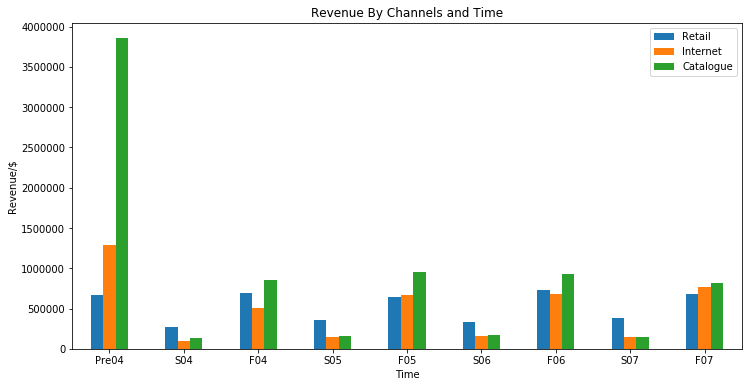

In [3]:
"""Sums revenue across all seasons and years according to each channel"""
ret_rev = [sum(df_summary.iloc[:,i]) for i in range(2,29,3)][::-1]
int_rev = [sum(df_summary.iloc[:,i]) + sum(df_summary.iloc[:,i+1]) for i in range(30,66,4)][::-1] #col 66 = intpre04Recency
cat_rev = [sum(df_summary.iloc[:,i]) + sum(df_summary.iloc[:,i+1]) for i in range(67,103,4)][::-1]

rev = pd.DataFrame([ret_rev,int_rev,cat_rev]).transpose()

rev.columns = ['Retail','Internet','Catalogue']

rev.index = ['F07','S07','F06','S06','F05','S05','F04','S04','Pre04'][::-1]

ax = rev.plot(kind = 'bar', title = 'Revenue By Channels and Time', rot = 0, figsize = (12,6))
ax.set(xlabel = 'Time', ylabel = 'Revenue/$')
plt.show()

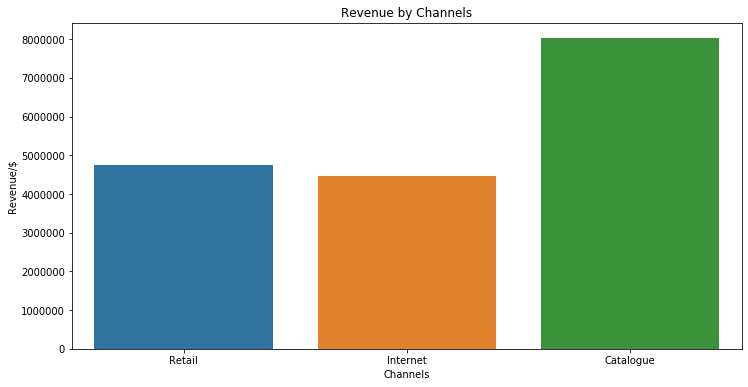

In [4]:
"""Plot without splitting by time"""
fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(x= "Channels", y="Revenue/$",data=\
            pd.DataFrame({'Revenue/$': [sum(ret_rev), sum(int_rev), sum(cat_rev)],\
                          "Channels":["Retail","Internet","Catalogue"]}))
ax.set_title("Revenue by Channels")
plt.show()

## Distribution of recency

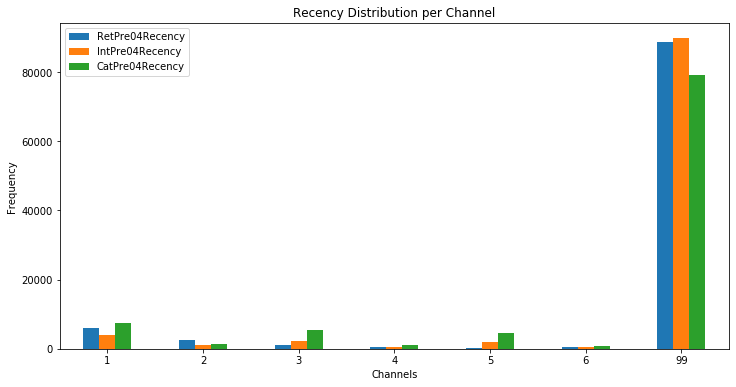

In [5]:
ret_rec = df_summary.iloc[:,29].value_counts().sort_index()
int_rec = df_summary.iloc[:,66].value_counts().sort_index()
cat_rec = df_summary.iloc[:,103].value_counts().sort_index()

rec = pd.DataFrame([ret_rec,int_rec,cat_rec]).transpose()
recplt = rec.plot(kind = 'bar', title = 'Recency Distribution per Channel', rot = 0, figsize = (12,6))
recplt.set(xlabel = 'Channels', ylabel = 'Frequency')
plt.show()

## Distribution of frequency of purchases by channel

In [9]:
df_summary['Retail Frequency'] = df_summary.apply(lambda x: sum([x[i] for i in range(3,29,3)]), axis = 1)
df_summary['Internet Frequency'] = df_summary.apply(lambda x: sum([x[i] for i in range(32,66,4)]), axis = 1)
df_summary['Catalogue Frequency'] = df_summary.apply(lambda x: sum([x[i] for i in range(69,103,4)]), axis = 1)

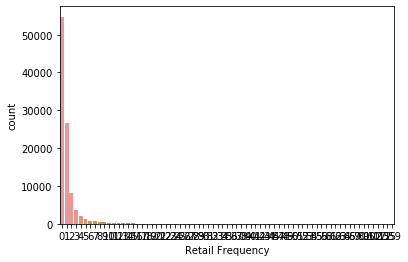

In [10]:
sns.countplot(df_summary['Retail Frequency'])

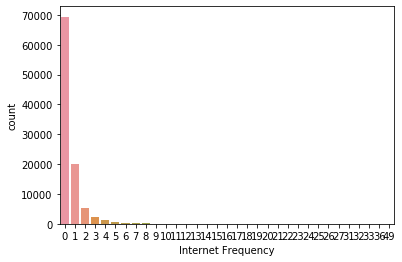

In [11]:
sns.countplot(df_summary['Internet Frequency'])

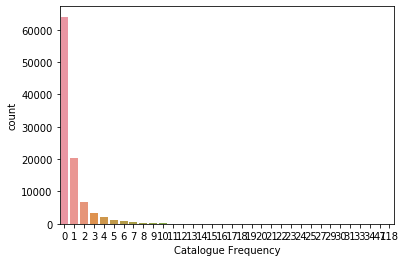

In [12]:
sns.countplot(df_summary['Catalogue Frequency'])

## Age distribution

In [13]:
"""Method to get total revenue depending on the channel specified"""
def getRev(row, channel):
    if channel == 'ret':
        return sum([row[i] for i in range(1,28,3)])
    elif channel == 'int':
        return sum([row[i] for i in range(29,65,4)])
    else:
        return sum([row[i] for i in range(66,102,4)])

In [14]:
"""Method to run getRev for all channels"""
def applyChannels(df):
    df['Retail'] = df.apply(lambda x: getRev(x, 'ret'), axis = 1)
    df['Internet'] = df.apply(lambda x: getRev(x, 'int'), axis = 1)
    df['Catalogue'] = df.apply(lambda x: getRev(x, 'cat'), axis = 1)

In [ ]:
"""Append age into a list to be plotted"""
retail = list()
internet = list()
catalogue = list()
def getAgeDist(row):
    age = int(row[159]) if row[159] != ' ' else -1
    if int(row[29]) != 99:
        retail.append(age)
    if int(row[66]) != 99:
        internet.append(age)
    if int(row[103]) != 99:
        catalogue.append(age)
df_summary.apply(getAgeDist, axis = 1)

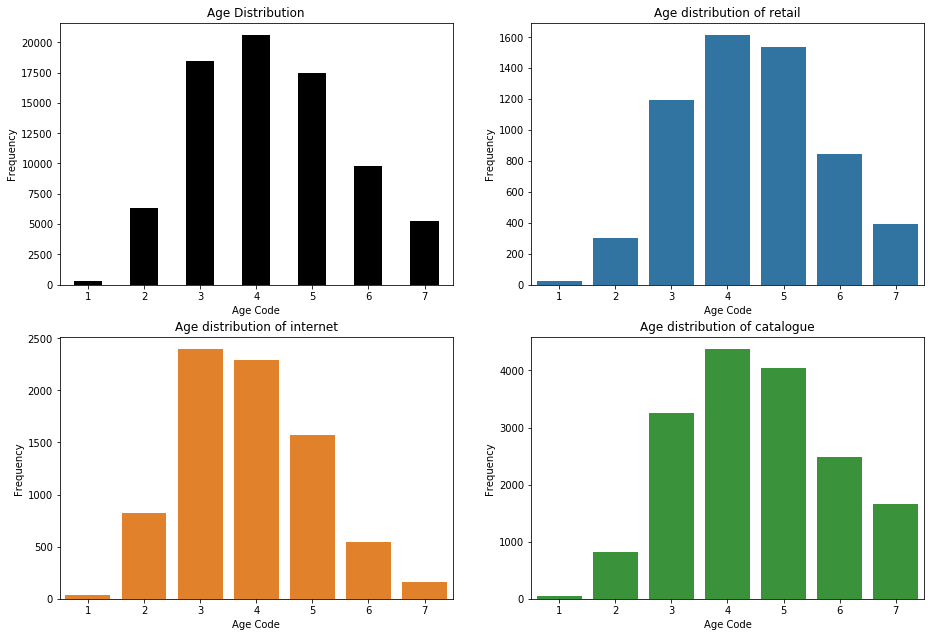

In [16]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=10, bottom = 6, right=11, top=7)

# Total distribution
age = pd.DataFrame(df_summary.AgeCode.value_counts().sort_index()[1:])
ageplt = age.plot.bar(rot = 0, title = "Age Distribution", figsize = (12,8),ax=axs[0, 0],color=["k"],legend=False)

#Retail
d = dict(Counter(retail).items())
for i in range(1,8):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Age", y="Frequency",data=\
            pd.DataFrame({'Age': labels,\
                          "Frequency":values}),\
           palette=["C0"], ax=axs[0,1]).set_title("Age distribution of retail")

#Internet
d = dict(Counter(internet).items())
for i in range(1,8):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Age", y="Frequency",data=\
            pd.DataFrame({'Age': labels,\
                          "Frequency":values}),\
           palette=["C1"], ax=axs[1,0]).set_title("Age distribution of internet")

#Catalogue
d = dict(Counter(catalogue).items())
for i in range(1,8):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Age", y="Frequency",data=\
            pd.DataFrame({'Age': labels,\
                          "Frequency":values}),\
           palette=["C2"], ax=axs[1,1]).set_title("Age distribution of catalogue")

for ax in axs.flat:
    ax.set(xlabel = 'Age Code', ylabel = 'Frequency')
    
plt.show()

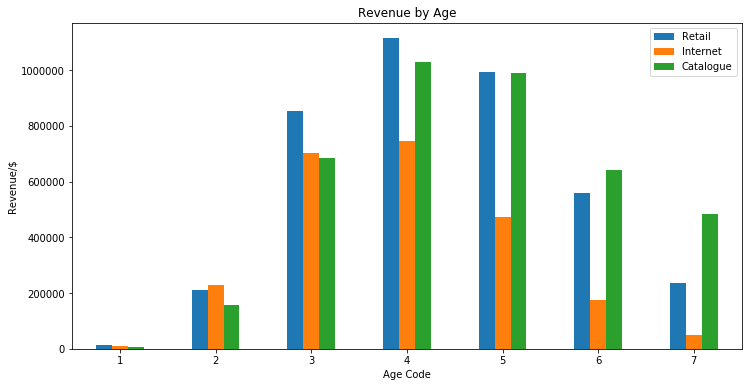

In [17]:
"""Plot of revenue by age"""
df_age = df_summary.groupby('AgeCode').sum()[1:]

applyChannels(df_age)

ageplt = df_age.plot(y = ['Retail','Internet', 'Catalogue'], kind = 'bar', title = 'Revenue by Age', \
                     rot = 0, figsize = (12,6),)
ageplt.set(xlabel = 'Age Code', ylabel = 'Revenue/$')
plt.show()

## Dwelling distribution

In [ ]:
retail = list()
internet = list()
catalogue = list()
def getDwellingDist(row):
    age = int(row[167]) if row[167] != ' ' else -1
    if int(row[29]) != 99:
        retail.append(age)
    if int(row[66]) != 99:
        internet.append(age)
    if int(row[103]) != 99:
        catalogue.append(age)
df_summary.apply(getDwellingDist, axis = 1)

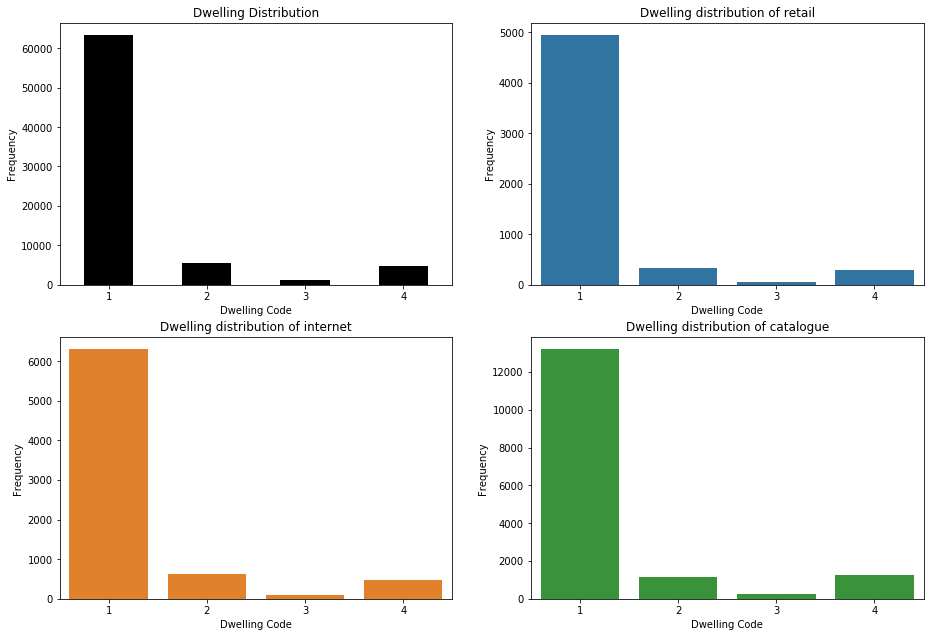

In [19]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=10, bottom = 6, right=11, top=7)

# Total distribution
dwelling = pd.DataFrame(df_summary.Dwelling.value_counts().sort_index()[1:])
dwellingplt = dwelling.plot.bar(rot = 0, title = "Dwelling Distribution", figsize = (12,8),ax=axs[0, 0],color=["k"],legend=False)

#Retail
d = dict(Counter(retail).items())
for i in range(1,5):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Dwelling", y="Frequency",data=\
            pd.DataFrame({'Dwelling': labels,\
                          "Frequency":values}),\
           palette=["C0"], ax=axs[0,1]).set_title("Dwelling distribution of retail")

#Internet
d = dict(Counter(internet).items())
for i in range(1,5):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Dwelling", y="Frequency",data=\
            pd.DataFrame({'Dwelling': labels,\
                          "Frequency":values}),\
           palette=["C1"], ax=axs[1,0]).set_title("Dwelling distribution of internet")

#Catalogue
d = dict(Counter(catalogue).items())
for i in range(1,5):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Dwelling", y="Frequency",data=\
            pd.DataFrame({'Dwelling': labels,\
                          "Frequency":values}),\
           palette=["C2"], ax=axs[1,1]).set_title("Dwelling distribution of catalogue")

for ax in axs.flat:
    ax.set(xlabel = 'Dwelling Code', ylabel = 'Frequency')
    
plt.show()

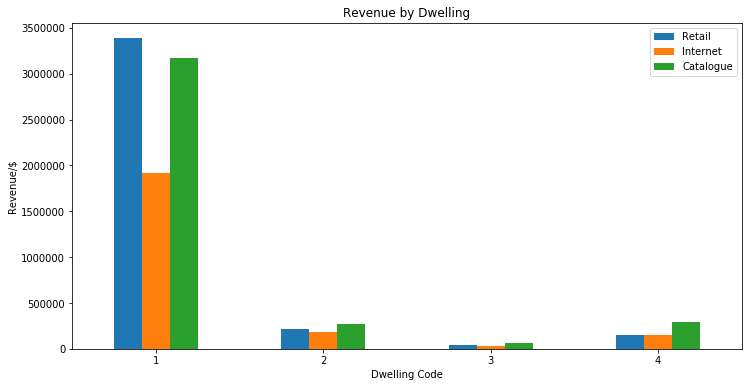

In [20]:
df_dwell = df_summary.groupby('Dwelling').sum()[1:]

applyChannels(df_dwell)

resLenplt = df_dwell.plot(y = ['Retail','Internet', 'Catalogue'], kind = 'bar', title = 'Revenue by Dwelling', \
                     rot = 0, figsize = (12,6),)
resLenplt.set(xlabel = 'Dwelling Code', ylabel = 'Revenue/$')
plt.show()

## Occupation distribution

In [ ]:
retail = list()
internet = list()
catalogue = list()
def getOcDist(row):
    age = int(row[140]) if row[140] != ' ' else -1
    if int(row[29]) != 99:
        retail.append(age)
    if int(row[66]) != 99:
        internet.append(age)
    if int(row[103]) != 99:
        catalogue.append(age)
df_summary.apply(getOcDist, axis = 1)

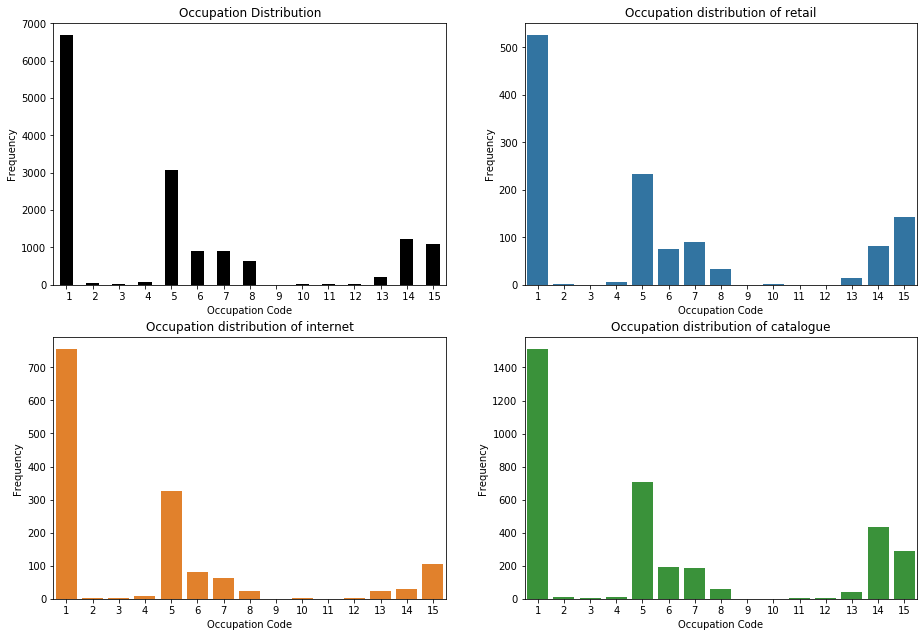

In [22]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=10, bottom = 6, right=11, top=7)

# Total distribution
oc = pd.DataFrame(df_summary.OccupCd.value_counts().sort_index()[1:])
ocplt = oc.plot.bar(rot = 0, title = "Occupation Distribution", figsize = (12,8),ax=axs[0, 0],color=["k"],legend=False)

#Retail
d = dict(Counter(retail).items())
for i in range(1,16):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Occupation", y="Frequency",data=\
            pd.DataFrame({'Occupation': labels,\
                          "Frequency":values}),\
           palette=["C0"], ax=axs[0,1]).set_title("Occupation distribution of retail")

#Internet
d = dict(Counter(internet).items())
for i in range(1,16):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Occupation", y="Frequency",data=\
            pd.DataFrame({'Occupation': labels,\
                          "Frequency":values}),\
           palette=["C1"], ax=axs[1,0]).set_title("Occupation distribution of internet")

#Catalogue
d = dict(Counter(catalogue).items())
for i in range(1,16):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Occupation", y="Frequency",data=\
            pd.DataFrame({'Occupation': labels,\
                          "Frequency":values}),\
           palette=["C2"], ax=axs[1,1]).set_title("Occupation distribution of catalogue")

for ax in axs.flat:
    ax.set(xlabel = 'Occupation Code', ylabel = 'Frequency')
    
plt.show()

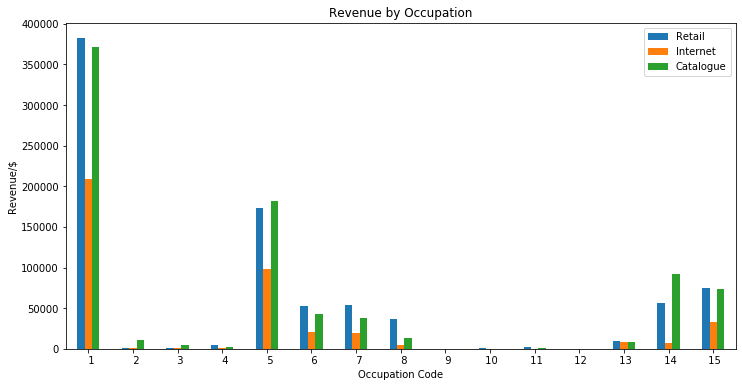

In [23]:
df_oc = df_summary.groupby('OccupCd').sum()[1:]

applyChannels(df_oc)

ocplt = df_oc.plot(y = ['Retail','Internet', 'Catalogue'], kind = 'bar', title = 'Revenue by Occupation', \
                     rot = 0, figsize = (12,6),)
ocplt.set(xlabel = 'Occupation Code', ylabel = 'Revenue/$')
plt.show()

## Income distribution

In [24]:
inc = pd.DataFrame(df_summary.IncCode.value_counts().sort_index()[1:])

In [ ]:
retail = list()
internet = list()
catalogue = list()
def getIncDist(row):
    inc = int(row[160]) if row[160] != ' ' else -1
    if int(row[29]) != 99:
        retail.append(inc)
    if int(row[66]) != 99:
        internet.append(inc)
    if int(row[103]) != 99:
        catalogue.append(inc)
df_summary.apply(getIncDist, axis = 1)

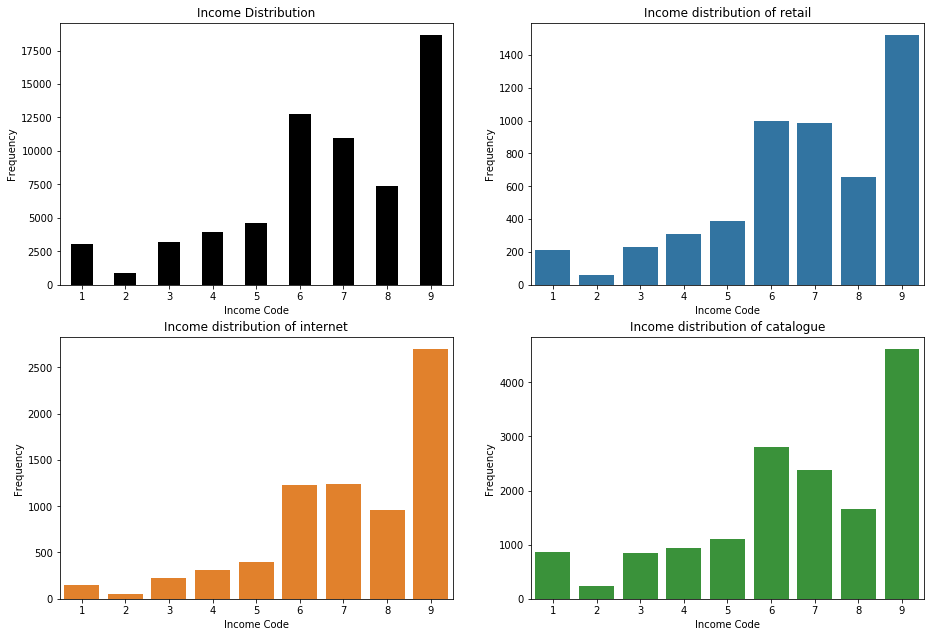

In [26]:
fig, axs = plt.subplots(2,2)
fig.subplots_adjust(left=10, bottom = 6, right=11, top=7)

# Total distribution
inc = pd.DataFrame(df_summary.IncCode.value_counts().sort_index()[1:])
incplt = inc.plot.bar(rot = 0, title = "Income Distribution", figsize = (12,8),ax=axs[0, 0],color=["k"],legend=False)

#Retail
d = dict(Counter(retail).items())
for i in range(1,10):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Income", y="Frequency",data=\
            pd.DataFrame({'Income': labels,\
                          "Frequency":values}),\
           palette=["C0"], ax=axs[0,1]).set_title("Income distribution of retail")

#Internet
d = dict(Counter(internet).items())
for i in range(1,10):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Income", y="Frequency",data=\
            pd.DataFrame({'Income': labels,\
                          "Frequency":values}),\
           palette=["C1"], ax=axs[1,0]).set_title("Income distribution of internet")

#Catalogue
d = dict(Counter(catalogue).items())
for i in range(1,10):
    if i not in d.keys():
        d[i] = 0
labels, values = zip(*sorted(list(d.items()))[1:])
sns.barplot(x= "Income", y="Frequency",data=\
            pd.DataFrame({'Income': labels,\
                          "Frequency":values}),\
           palette=["C2"], ax=axs[1,1]).set_title("Income distribution of catalogue")

for ax in axs.flat:
    ax.set(xlabel = 'Income Code', ylabel = 'Frequency')
    
plt.show()

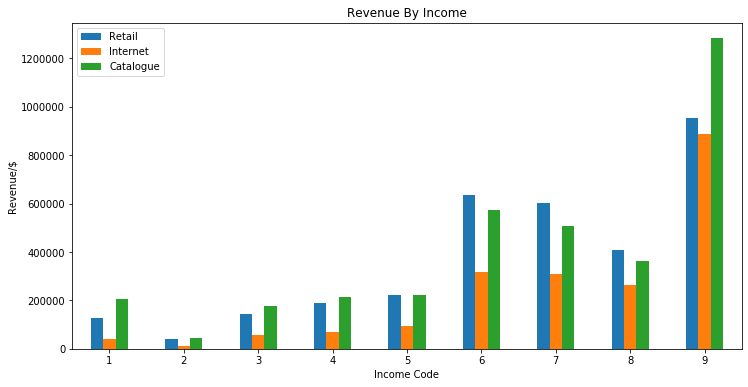

In [27]:
df_inc = df_summary.groupby('IncCode').sum()[1:]

applyChannels(df_inc)

incplt = df_inc.plot(y = ['Retail','Internet', 'Catalogue'], kind = 'bar', title = 'Revenue By Income', \
                     rot = 0, figsize = (12,6))
incplt.set(xlabel = 'Income Code', ylabel = 'Revenue/$')
plt.show()

## Distribution of presence of children per channel

In [31]:
def childPres(child):
    if child[0] == ' ' or child[1] == ' ' or child[2] == ' ' or child[3] == ' ' or child[4] == ' ':
        return 2 #NA values
    elif child[0] == 'Y' or child[1] == 'Y' or child[2] == 'Y' or child[3] == 'Y' or child[4] == 'Y':
        return 1
    return 0
df_summary['child'] = df_summary.iloc[:,162:167].apply(childPres, axis = 1)

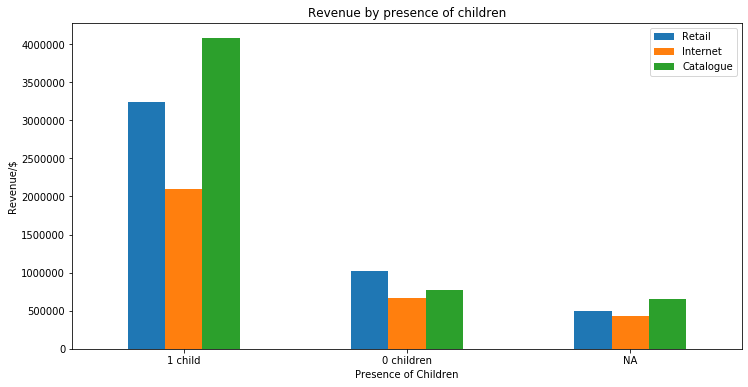

In [32]:
df_child = df_summary.groupby('child').sum()
applyChannels(df_child)

childplt = df_child.plot(y = ['Retail','Internet', 'Catalogue'], kind = 'bar', title = 'Revenue by presence of children', \
                     rot = 0, figsize = (12,6))
childplt.set(xlabel = 'Presence of Children', ylabel = 'Revenue/$')
childplt.set_xticklabels(["1 child", "0 children", "NA"])
plt.show()

## Plot of revenue against length of resident for each channel

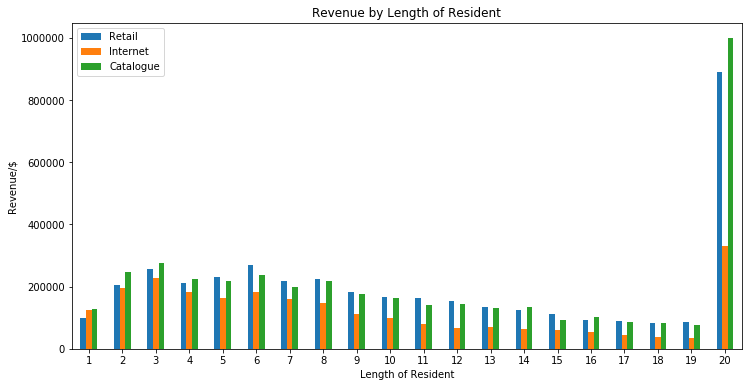

In [33]:
df_summary['intLengthRes'] = df_summary.LengthRes.apply(lambda x: eval(x) if x != ' ' else -1)
df_resLen = df_summary.groupby('intLengthRes').sum()[1:]

applyChannels(df_resLen)

resLenplt = df_resLen.plot(y = ['Retail','Internet', 'Catalogue'], kind = 'bar', title = 'Revenue by Length of Resident', \
                     rot = 0, figsize = (12,6),)
resLenplt.set(xlabel = 'Length of Resident', ylabel = 'Revenue/$')
plt.show()

## Plot distance from store against revenue for each channel

 0.00       3154
-1.00        968
 2.31        232
 13.57       144
 4.76        138
            ... 
 55.96         1
 281.14        1
 1071.98       1
 141.43        1
 76.23         1
Name: StoreDist, Length: 8753, dtype: int64

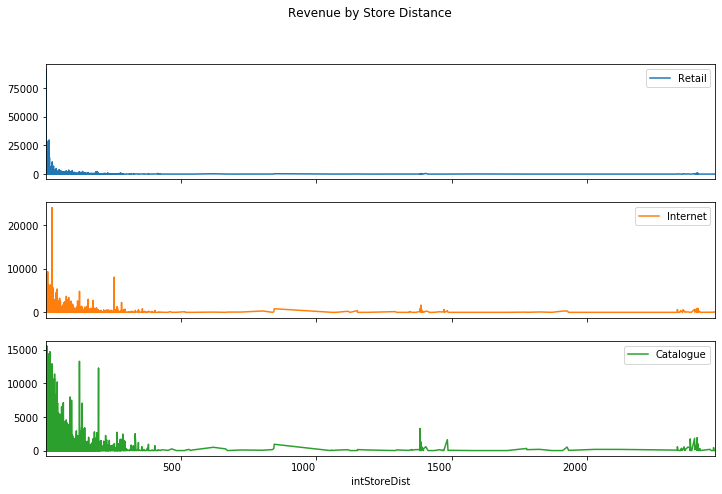

In [34]:
# must put in bins
df_summary['intStoreDist'] = df_summary.StoreDist.apply(lambda x: eval(x) if x != ' ' else -1)
df_dist = df_summary.groupby('intStoreDist').sum()[1:]

applyChannels(df_dist)

distplt = df_dist.plot(y = ['Retail','Internet', 'Catalogue'], kind = 'line', title = 'Revenue by Store Distance', \
                     rot = 0, figsize = (12,8),subplots=True)
# distplt.set(xlabel = 'Distance from Store', ylabel = 'Revenue/$')

df_summary.StoreDist.apply(lambda x: eval(x) if x != ' ' else -1).value_counts()